Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


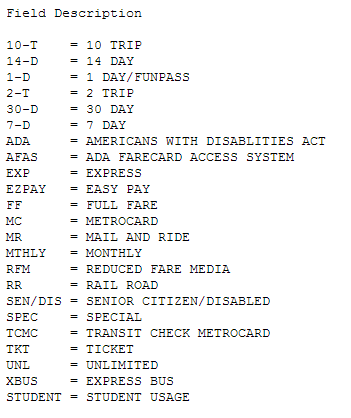

In [81]:
from __future__ import print_function, division
import pylab as pl
import numpy as np
import pandas as pd
from scipy import stats
import os

%pylab inline

from IPython.display import Image
from IPython.display import clear_output
pl.rcParams['font.size'] = 20
Image(filename = "Ridetypes-Copy1.png")

In [134]:
mta = np.load('MTA_Fare-Copy1.npy')

In [82]:
mta.shape

(600, 23, 194)

In [135]:
#convert missing values of -1 to nan
mta = mta.astype('float')
mta[mta == -1] = np.nan

# Task 4:
Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [92]:
# We want each station as the index
mta = np.nansum(mta,axis=1)

In [93]:
mta.shape

(600, 194)

In [89]:
52*3

156

In [88]:
#we want at an annual period 
194/52

3.730769230769231

In [ ]:
# We want only 3 full years for our Fourier transformation, so lets take off the extra past 156 weeks

In [102]:
mta156 = mta[:, :157]

In [103]:
mta156.shape

(600, 157)

In [104]:
# transpose dataframe so we can add the periodicity
df_mta156 = pd.DataFrame.from_records(mta156)

In [105]:
df_mta156.head()

,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,156
0,126878.0,149477.0,152383.0,160175.0,162641.0,156414.0,159156.0,159374.0,163285.0,159252.0,...,79927.0,94058.0,104629.0,88395.0,113814.0,118073.0,113264.0,119009.0,115030.0,121306.0
1,37306.0,46464.0,49359.0,44849.0,41509.0,35654.0,41989.0,41909.0,41214.0,41142.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6606.0,6881.0,7229.0,5731.0,7032.0,5107.0,5497.0,5668.0,5555.0,6942.0,...,5312.0,5951.0,6029.0,7195.0,8259.0,8533.0,8830.0,8603.0,7752.0,6861.0
3,16378.0,17408.0,17595.0,14242.0,17589.0,13168.0,14510.0,14388.0,14221.0,17180.0,...,13986.0,14857.0,15385.0,20271.0,21583.0,23687.0,23428.0,23425.0,21339.0,18429.0
4,18564.0,19903.0,19948.0,16076.0,20283.0,14601.0,16151.0,16066.0,16205.0,19619.0,...,15669.0,16715.0,17277.0,19521.0,22762.0,23515.0,23503.0,23227.0,21275.0,18999.0


In [106]:
df_mta156.shape

(600, 157)

In [107]:
# we want to standardize along each station. Subtract mean/divide by std
df_mta156_st = ((df_mta156.T - df_mta156.mean(1)) / df_mta156.std(1)).T

In [108]:
df_mta156_st.head()

,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,156
0,0.048258,0.643034,0.719516,0.924591,0.989493,0.825607,0.897772,0.903510,1.006442,0.900299,...,-1.187432,-0.815522,-0.537307,-0.964565,-0.295570,-0.183479,-0.310045,-0.158844,-0.263566,-0.098390
1,0.671329,1.193500,1.358567,1.101416,0.910976,0.577135,0.938345,0.933783,0.894156,0.890050,...,-1.455786,-1.455786,-1.455786,-1.455786,-1.455786,-1.455786,-1.455786,-1.455786,-1.455786,-1.455786
2,-0.522470,-0.235765,0.127047,-1.434712,-0.078338,-2.085271,-1.678672,-1.500393,-1.618203,-0.172169,...,-1.871546,-1.205348,-1.124028,0.091599,1.200886,1.486548,1.796189,1.559527,0.672307,-0.256616
3,-0.682858,-0.342523,-0.280735,-1.388640,-0.282717,-1.743513,-1.300086,-1.340398,-1.395578,-0.417860,...,-1.473228,-1.185430,-1.010967,0.603475,1.036988,1.732196,1.646617,1.645626,0.956366,-0.005163
4,-0.584613,-0.032759,-0.014212,-1.610016,0.123854,-2.217922,-1.579106,-1.614138,-1.556850,-0.149806,...,-1.777757,-1.346659,-1.115037,-0.190196,1.145548,1.455889,1.450943,1.337193,0.532697,-0.405333


In [109]:
df_mta156_st.dropna(inplace=True)

In [110]:
df_mta156_st.shape

(470, 157)

In [112]:
# Lets turn it back into an array to look at in Fourier Space 
mta_ar156 = pd.DataFrame.as_matrix(df_mta156_st)

In [113]:
mta_ar156.shape

(470, 157)

In [ ]:
# 4. Fourier transform
# from the numpy package you will nees only the np.fft.rfft() to take the fourier transform

In [114]:
#j indicate imaginary: the second piece of mta entry is its complex component
np.fft.rfft(mta_ar156)

array([[  5.55111512e-15 +0.j        ,  -4.22008746e+01-25.1964698j ,
          7.44110960e+00-43.84724715j, ...,  -2.11064488e+00 -0.28722649j,
         -7.69029688e-02 -2.96787204j,   1.07581308e+00 +2.82636361j],
       [ -2.30926389e-14 +0.j        ,  -3.96216831e+01-80.63048234j,
          1.82522775e+01-34.5200071j , ...,   6.36375270e-01 +2.29717099j,
         -5.10836220e-01 -0.48338099j,   2.84497075e+00 +1.62406039j],
       [  1.99840144e-14 +0.j        ,  -3.58572312e+01 -4.81603387j,
          3.06895027e+01 -8.92186057j, ...,  -6.33175114e+00 -6.26879214j,
          4.58574431e-02 -9.97160403j,   1.21213750e+01 +2.44636546j],
       ..., 
       [  9.72555370e-14 +0.j        ,  -4.41457137e+01-14.77351888j,
          6.29039717e+00-23.49392147j, ...,  -2.12448427e+00 -0.67149341j,
          1.40371903e+00 -3.90583615j,   5.17959764e+00 +8.85526332j],
       [ -3.50830476e-14 +0.j        ,  -3.40921215e+01-41.80410545j,
          8.44836002e+00-44.03156959j, ...,  -2.45185

## To detect periodicity we use the "power spectrum": square (or absolute value) of the real part of the fourier transform

In [115]:
(np.fft.rfft(mta_ar156).real)**2

array([[  3.08148791e-29,   1.78091382e+03,   5.53701120e+01, ...,
          4.45482181e+00,   5.91406660e-03,   1.15737378e+00],
       [  5.33269972e-28,   1.56987777e+03,   3.33145633e+02, ...,
          4.04973484e-01,   2.60953644e-01,   8.09385859e+00],
       [  3.99360833e-28,   1.28574103e+03,   9.41845574e+02, ...,
          4.00910725e+01,   2.10290508e-03,   1.46927733e+02],
       ..., 
       [  9.45863947e-27,   1.94884404e+03,   3.95690966e+01, ...,
          4.51343341e+00,   1.97042712e+00,   2.68282317e+01],
       [  1.23082023e-27,   1.16227275e+03,   7.13747869e+01, ...,
          6.01160209e+00,   4.81727052e-01,   7.75403281e+00],
       [  2.48540489e-28,   2.75783105e+02,   4.22171576e+00, ...,
          6.15314547e-01,   5.24051942e-01,   3.79106105e+01]])

In [116]:
len(mta_ar156)

470

In [117]:
mta_ar156.shape

(470, 157)

In [120]:
fr[2:80]

array([  4.22171576e+00,   4.86481865e+02,   5.40931418e+01,
         4.54655181e+02,   4.41887352e+01,   1.76303511e+02,
         3.61902047e+02,   2.74824566e+01,   3.50907643e+02,
         6.46605020e+01,   1.01488029e+02,   3.12214903e+02,
         1.00124462e+01,   2.43028786e+02,   6.41714699e+01,
         5.80345157e+00,   2.44733778e+02,   1.38866271e+01,
         2.36560479e+02,   1.62832010e+02,   4.35017234e+00,
         7.67706022e+01,   9.50605932e-01,   9.97273121e+01,
         1.85864254e+02,   5.72170062e+00,   1.55931528e+02,
         7.72026945e+01,   4.09163822e+01,   1.63857058e+02,
         1.76670596e-03,   1.01817296e+02,   2.46391188e+02,
         4.93286018e+00,   5.47865984e+02,   2.02186269e+00,
         1.50214277e+02,   1.76639538e+02,   3.88283143e-01,
         2.39323812e+02,   4.85845557e+00,   3.48452672e+00,
         8.06969623e+01,   1.58080461e-02,   1.82493970e+02,
         1.34906634e+00,   7.49135895e-01,   1.09751969e+02,
         4.61755137e-01,

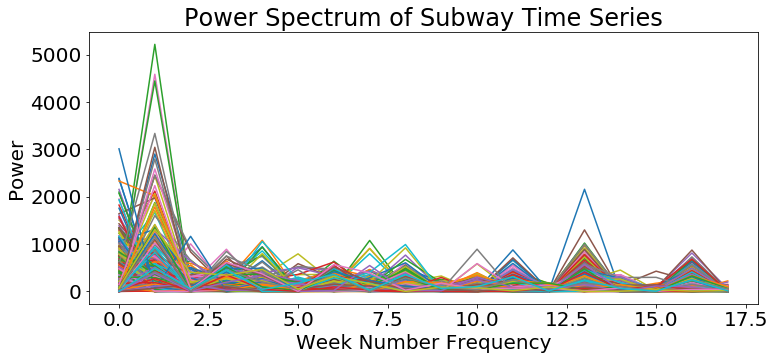

In [125]:
pl.figure(figsize=(12,5))
for i in range(len(mta_ar156)):
    fr=np.square((np.fft.rfft(mta_ar156[i]).real))
    pl.plot(fr[2:20])
    pl.xlabel("Week Number Frequency")
    pl.title ("Power Spectrum of Subway Time Series")
    pl.ylabel("Power")

Here it looks like there is a cycle every week! Makes sense, humans are habitual creatures and a work schedule has a frequency of a week. We also see a peak at around 13 weeks, which is about 3 full months, perhaps identifying a quarter in the year which would also make sense.

In [97]:
mta_ar.shape[1]

52

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Power')

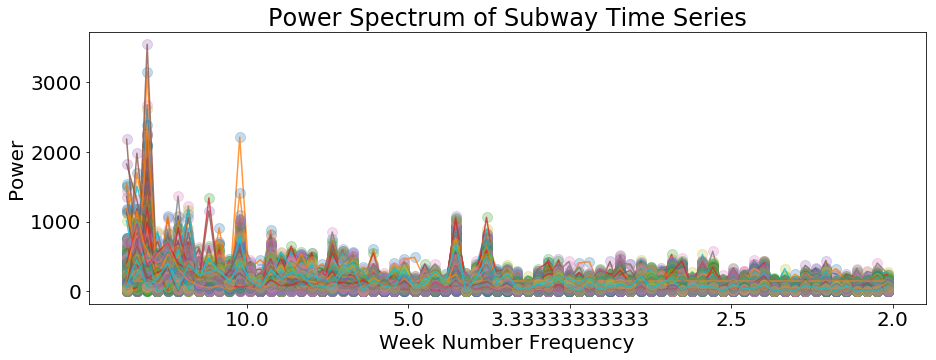

In [123]:
peak = []
N = mta_ar156.shape[1]
pl.figure(figsize=(12,5))
fig=pl.figure(figsize=(15,5))
for i in range(len(mta_ar156)):
    #fr=np.square((np.fft.rfft(mta_ar156[i]).real))
    f = np.abs(np.fft.rfft(mta_ar156[i]))**2   
    ax=fig.add_subplot(111)
    ax.plot(np.fft.rfftfreq(N, 1.0)[4:], (f[4:]), 'o', ms=10 , alpha= .25)
    ax.plot(np.fft.rfftfreq(N, 1.0)[4:], (f[4:]), '-' , alpha = .8)
    peak.append(f[4:].max())
    #pl.plot(fr[2:])
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("Week Number Frequency")
pl.title ("Power Spectrum of Subway Time Series")
pl.ylabel("Power")

In [126]:
#pd.DataFrame
peak156 = pd.DataFrame(peak)

In [127]:
top4_156 = peak156.sort_values(by = 0 ,axis = 0, ascending = False).head(4)

In [128]:
top4_156

,0
282,3546.509705
150,3154.433752
168,2678.720858
29,2620.338727


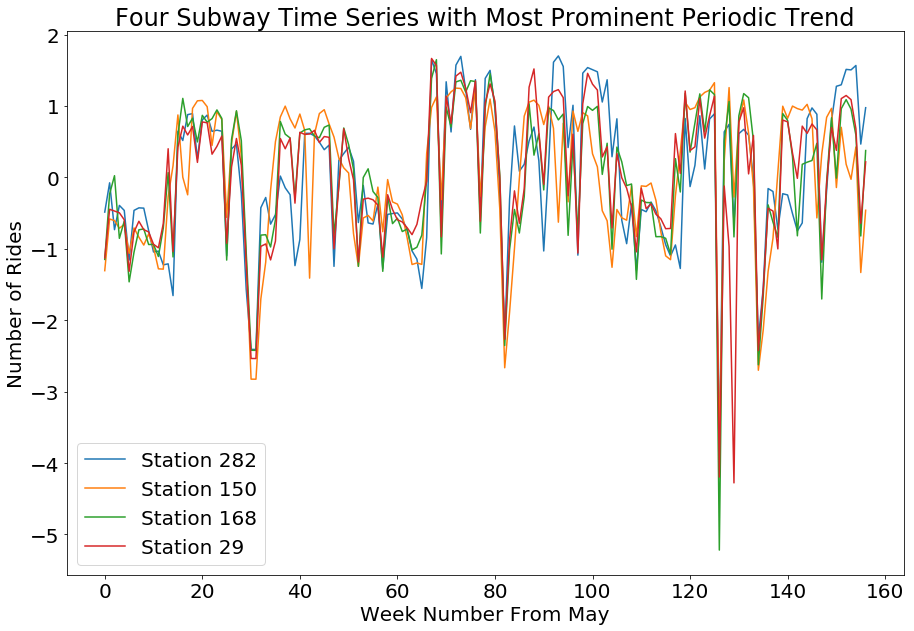

In [129]:
pl.figure(figsize=(15,10))
for j in top4_156.index:
    pl.plot(mta_ar156[j], label = 'Station %s'%j)
pl.xlabel("Week Number From May")
pl.title ("Four Subway Time Series with Most Prominent Periodic Trend")
pl.ylabel("Number of Rides")
pl.legend()

Here we see the 4 subway stations with the maximum value in the Fourier transformation. We see they each follow a pretty similar pattern with their highs and lows. 

## Find which stations show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

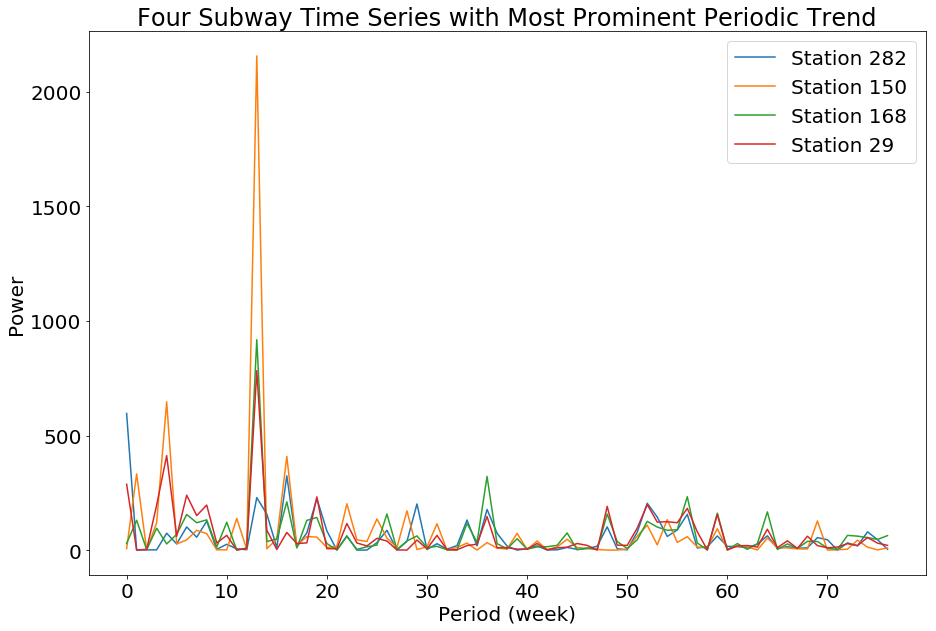

In [133]:
pl.figure(figsize=(15,10))
for j in top4_156.index:
    fr=np.square((np.fft.rfft(mta_ar156[j]).real))
    pl.plot(fr[2:], label = 'Station %s'%j)
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("Period (week)")
pl.title ("Four Subway Time Series with Most Prominent Periodic Trend")
pl.ylabel("Power")
pl.legend()

This is an interesting plot to see that every 13 weeks these four stations have the highest periodic trend. Maybe these stations are most used by those in the business world that operate on the quarterly basis where every three months there is a cycle in their daily routine.

# Now lets look at one 52 Week Period

In [13]:
# make into a dataframe
np.nansum(mta,axis=1).T.shape

(194, 600)

In [84]:
52*3

156

In [4]:
# transpose dataframe so we can add the periodicity
df_mta = pd.DataFrame.from_records(np.nansum(mta,axis=1))

In [32]:
df_mta.head()

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,126878.0,149477.0,152383.0,160175.0,162641.0,156414.0,159156.0,159374.0,163285.0,159252.0,...,87973.0,83825.0,91001.0,80908.0,79891.0,69881.0,79550.0,78901.0,74591.0,76833.0
1,37306.0,46464.0,49359.0,44849.0,41509.0,35654.0,41989.0,41909.0,41214.0,41142.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6606.0,6881.0,7229.0,5731.0,7032.0,5107.0,5497.0,5668.0,5555.0,6942.0,...,8268.0,5928.0,5656.0,7665.0,8377.0,7343.0,7743.0,8171.0,7907.0,6790.0
3,16378.0,17408.0,17595.0,14242.0,17589.0,13168.0,14510.0,14388.0,14221.0,17180.0,...,23450.0,16228.0,15586.0,21806.0,23534.0,20604.0,21370.0,22459.0,22773.0,19033.0
4,18564.0,19903.0,19948.0,16076.0,20283.0,14601.0,16151.0,16066.0,16205.0,19619.0,...,23025.0,18253.0,17293.0,21484.0,22516.0,20560.0,21942.0,23283.0,22987.0,21562.0


In [163]:
df_mta.shape

(600, 194)

In [5]:
# we want to standardize along each station. Subtract mean/divide by std
df_mta = ((df_mta.T - df_mta.mean(1)) / df_mta.std(1)).T

In [167]:
df_mta.shape

(194, 600)

In [6]:
#Transpose it
df_mta = df_mta.T

In [7]:
#Make the index into each annual period
df_mta.index = df_mta.index%52

In [8]:
df_mta.head(53)

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,0.202071,0.889935,-0.649826,-0.834317,-0.737333,-0.814121,-0.869427,-0.863463,-0.596344,-1.642393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.811194,1.379618,-0.369790,-0.508762,-0.191135,-0.586676,-0.131820,-0.591457,-0.206278,-1.357357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.889521,1.534415,-0.015416,-0.449656,-0.172779,-0.372779,-0.085527,-0.410438,-0.312336,-1.315118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.099543,1.293263,-1.540852,-1.509448,-1.752226,-1.732097,-1.479882,-1.477392,-1.563678,-1.354073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.166010,1.114671,-0.216024,-0.451552,-0.036128,-0.485432,0.145940,-0.454975,-0.282441,-1.252805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.998171,0.801602,-2.176280,-1.848910,-2.353900,-2.381989,-2.198972,-2.063068,-2.350927,-1.527766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.072077,1.140337,-1.779137,-1.424741,-1.721632,-1.812309,-1.452723,-1.494153,-1.677565,-1.347805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.077953,1.136060,-1.605005,-1.463302,-1.756305,-1.915693,-1.443465,-1.553056,-1.915306,-1.280753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.183368,1.098898,-1.720075,-1.516086,-1.699605,-1.896085,-1.486672,-1.471646,-1.762269,-1.319186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.074665,1.095048,-0.307673,-0.580826,-0.306983,-0.608779,-0.192310,-0.635035,-0.528011,-1.275865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#group by the average of each index
df_mta = df_mta.groupby(df_mta.index).mean()

Text(0.5,1,'Quick Look at Perodicity')

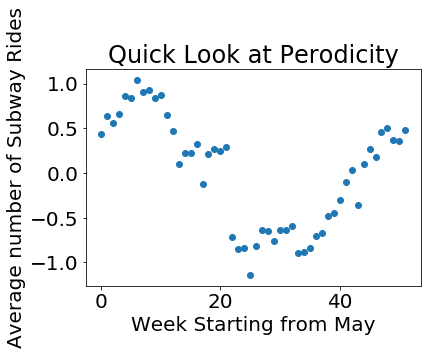

In [10]:
# a quick look at the periodicity
plt.scatter(df_mta.index,df_mta[0])
plt.xlabel('Week Starting from May')
plt.ylabel('Average number of Subway Rides')
plt.title('Quick Look at Perodicity')

In [11]:
# flip it back so we have the station as the index again
df_mta = df_mta.T

In [43]:
df_mta.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.433454,0.634365,0.562332,0.658678,0.858760,0.843774,1.043547,0.905747,0.930376,0.837743,...,0.031195,-0.362650,0.102236,0.270228,0.181344,0.458795,0.508452,0.372651,0.356048,0.475587
1,0.186919,0.501713,0.513797,0.467933,0.430824,0.172081,0.015572,-0.001164,-0.007246,-0.026843,...,0.183822,0.010470,0.132134,0.210842,0.154003,0.134076,0.250695,0.248254,0.197528,0.193571
2,-0.290616,0.038300,0.213704,-0.206096,-0.282724,-0.874874,-0.447182,-0.443618,-0.403649,-0.463220,...,0.289060,-0.850774,-0.522198,-0.916964,-0.487914,0.281253,0.676698,0.574188,0.235428,-0.002857
3,-0.308925,-0.062230,-0.209520,-0.477786,-0.334289,-0.690029,-0.366292,-0.434089,-0.534838,-0.495012,...,0.106843,-0.528463,-0.587885,-0.890051,-0.230934,0.415225,0.720340,0.470537,0.307760,0.141927
4,-0.442819,0.053002,0.215250,-0.216936,0.002012,-0.764868,-0.245490,-0.307391,-0.326053,-0.321464,...,0.102563,-1.020154,-0.715170,-0.852365,-0.729311,0.421825,0.717427,0.372331,0.041784,-0.041295


In [12]:
df_mta.dropna(inplace=True)

In [45]:
df_mta.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.433454,0.634365,0.562332,0.658678,0.858760,0.843774,1.043547,0.905747,0.930376,0.837743,...,0.031195,-0.362650,0.102236,0.270228,0.181344,0.458795,0.508452,0.372651,0.356048,0.475587
1,0.186919,0.501713,0.513797,0.467933,0.430824,0.172081,0.015572,-0.001164,-0.007246,-0.026843,...,0.183822,0.010470,0.132134,0.210842,0.154003,0.134076,0.250695,0.248254,0.197528,0.193571
2,-0.290616,0.038300,0.213704,-0.206096,-0.282724,-0.874874,-0.447182,-0.443618,-0.403649,-0.463220,...,0.289060,-0.850774,-0.522198,-0.916964,-0.487914,0.281253,0.676698,0.574188,0.235428,-0.002857
3,-0.308925,-0.062230,-0.209520,-0.477786,-0.334289,-0.690029,-0.366292,-0.434089,-0.534838,-0.495012,...,0.106843,-0.528463,-0.587885,-0.890051,-0.230934,0.415225,0.720340,0.470537,0.307760,0.141927
4,-0.442819,0.053002,0.215250,-0.216936,0.002012,-0.764868,-0.245490,-0.307391,-0.326053,-0.321464,...,0.102563,-1.020154,-0.715170,-0.852365,-0.729311,0.421825,0.717427,0.372331,0.041784,-0.041295


In [71]:
df_mta.shape

(471, 52)

In [13]:
# Lets turn it back into an array to look at in Fourier Space 
mta_ar = pd.DataFrame.as_matrix(df_mta)

In [14]:
mta_ar.shape

(471, 52)

In [ ]:
# 4. Fourier transform
# from the numpy package you will nees only the np.fft.rfft() to take the fourier transform

In [15]:
#j indicate imaginary: the second piece of mta entry is its complex component
np.fft.rfft(mta_ar)

array([[  0.26706291 +0.j        ,  17.44647256-12.02439229j,
         -1.49787046 +0.10048283j, ...,  -0.94161443 +0.49460631j,
         -0.12905542 +0.08662473j,   1.17801716 +0.j        ],
       [  0.49700517 +0.j        ,   5.89947097 -0.71873984j,
          1.93051437 +2.52859039j, ...,   0.05593835 -0.1840926j ,
         -0.59824265 -0.26149189j,   0.76039026 +0.j        ],
       [  0.05126829 +0.j        ,  -5.27851019 +0.18283389j,
          1.88461718 +6.84540935j, ...,  -0.91211300 +0.15866506j,
          1.58132509 +0.4423061j ,   0.92182924 +0.j        ],
       ..., 
       [  0.05893142 +0.j        ,  11.52859807-11.78924004j,
         -4.69847939 +2.95522945j, ...,  -0.96546517 +0.34781977j,
         -0.90626670 +0.34620439j,   3.09254302 +0.j        ],
       [  0.56664740 +0.j        ,  10.64376113 -5.23979575j,
         -5.90191477 +2.8134672j , ...,  -0.72667027 +0.07806619j,
         -0.45896584 +0.15698607j,   0.35169561 +0.j        ],
       [ -0.47699700 +0.j  

## To detect periodicity we use the "power spectrum": square (or absolute value) of the real part of the fourier transform

In [16]:
(np.fft.rfft(mta_ar).real)**2

array([[  7.13225957e-02,   3.04379405e+02,   2.24361592e+00, ...,
          8.86637734e-01,   1.66553003e-02,   1.38772442e+00],
       [  2.47014140e-01,   3.48037578e+01,   3.72688574e+00, ...,
          3.12909877e-03,   3.57894273e-01,   5.78193344e-01],
       [  2.62843733e-03,   2.78626698e+01,   3.55178192e+00, ...,
          8.31950132e-01,   2.50058905e+00,   8.49769141e-01],
       ..., 
       [  3.47291281e-03,   1.32908574e+02,   2.20757085e+01, ...,
          9.32122987e-01,   8.21319336e-01,   9.56382236e+00],
       [  3.21089278e-01,   1.13289651e+02,   3.48325980e+01, ...,
          5.28049688e-01,   2.10649641e-01,   1.23689803e-01],
       [  2.27526136e-01,   6.46025616e+01,   1.75157133e+00, ...,
          6.17006848e-01,   1.81460539e+00,   7.69729913e+00]])

In [60]:
len(mta_ar)

471

In [81]:
mta_ar.shape

(471, 52)

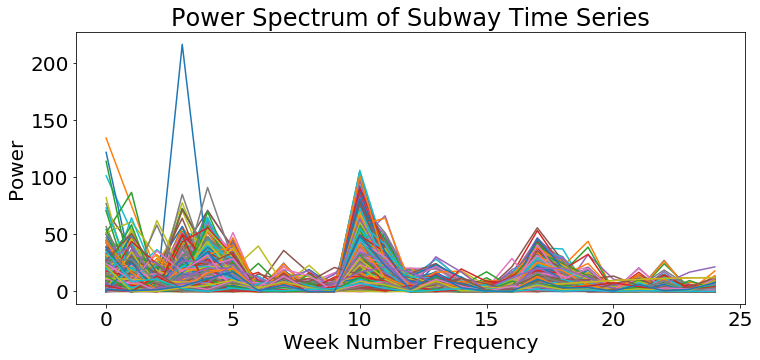

In [82]:
pl.figure(figsize=(12,5))
for i in range(len(mta_ar)):
    fr=np.square((np.fft.rfft(mta_ar[i]).real))
    pl.plot(fr[2:])
    pl.xlabel("Week Number Frequency")
    pl.title ("Power Spectrum of Subway Time Series")
    pl.ylabel("Power")

The x axis is the frequency, and it is a bit tricky: it runs from 0 (period of 0 week from May) to the maximum frequency which is 1/2 the number of samples: 52 here. That is because I need at least 2 points to describe a pattern

In [97]:
mta_ar.shape[1]

52

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Power')

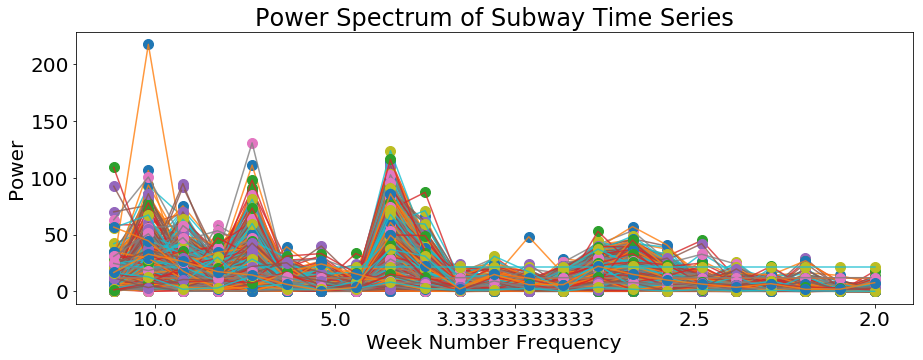

In [17]:
peak = []
N = mta_ar.shape[1]
pl.figure(figsize=(12,5))
fig=pl.figure(figsize=(15,5))
for i in range(len(mta_ar)):
    #fr=np.square((np.fft.rfft(mta_ar[i]).real))
    f = np.abs(np.fft.rfft(mta_ar[i]))**2   
    ax=fig.add_subplot(111)
    ax.plot(np.fft.rfftfreq(N, 1.0)[4:], (f[4:]), 'o', ms=10)
    ax.plot(np.fft.rfftfreq(N, 1.0)[4:], (f[4:]), '-' , alpha = .8)
    peak.append(f[4:].max())
    #pl.plot(fr[2:])
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("Week Number Frequency")
pl.title ("Power Spectrum of Subway Time Series")
pl.ylabel("Power")

In [20]:
#pd.DataFrame
peak = pd.DataFrame(peak)

In [60]:
top4 = peak.sort_values(by = 0 ,axis = 0, ascending = False).head(4)

In [71]:
top4

,0
150,217.520351
333,130.787037
169,123.903721
441,116.244471


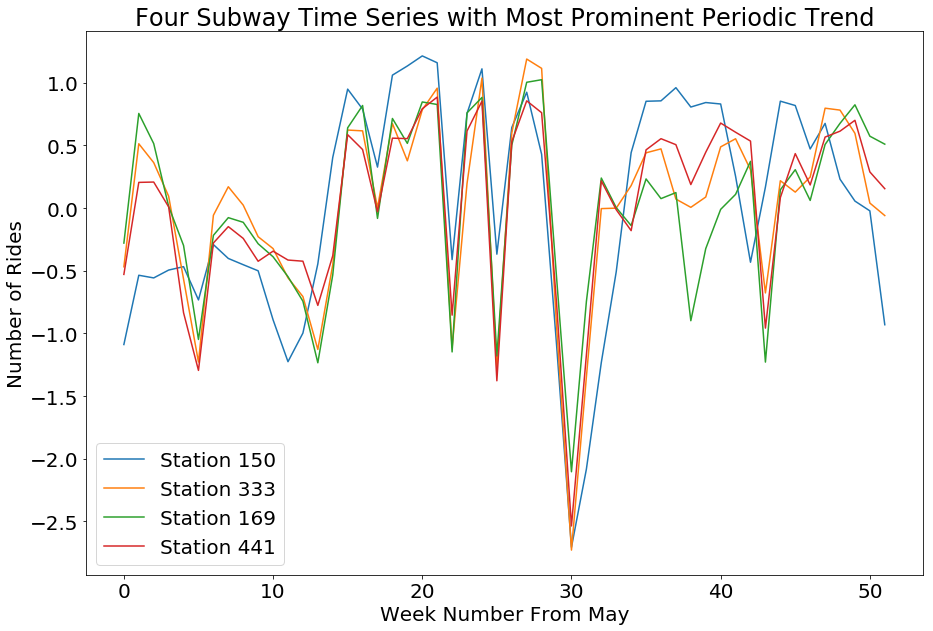

In [65]:
pl.figure(figsize=(15,10))
for j in top4.index:
    pl.plot(mta_ar[j], label = 'Station %s'%j)
pl.xlabel("Week Number From May")
pl.title ("Four Subway Time Series with Most Prominent Periodic Trend")
pl.ylabel("Number of Rides")
pl.legend()

Here we see the 4 subway stations with the maximum value in the Fourier transformation. 

## Find which stations show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

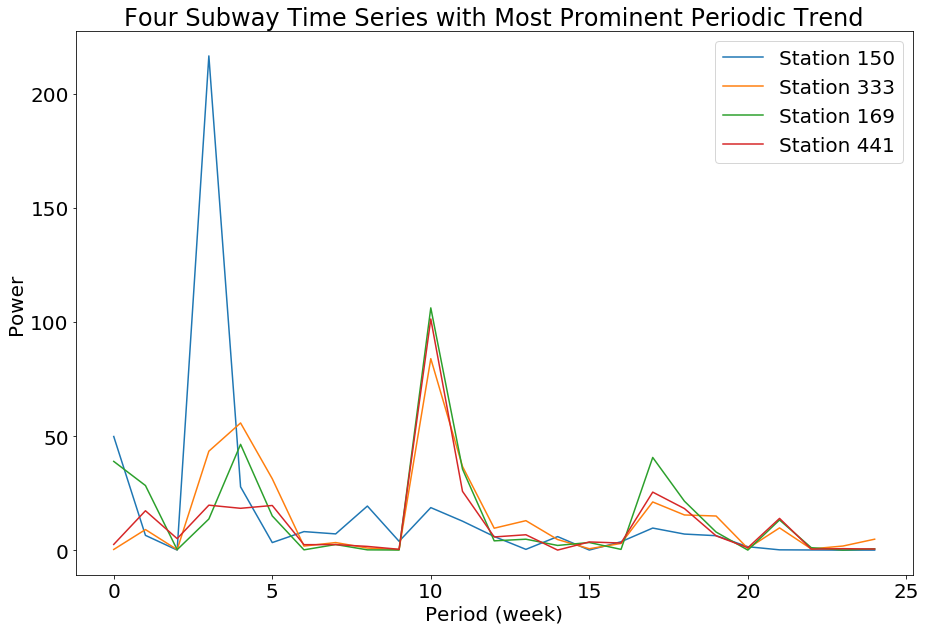

In [70]:
pl.figure(figsize=(15,10))
for j in top4.index:
    fr=np.square((np.fft.rfft(mta_ar[j]).real))
    pl.plot(fr[2:], label = 'Station %s'%j)
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("Period (week)")
pl.title ("Four Subway Time Series with Most Prominent Periodic Trend")
pl.ylabel("Power")
pl.legend()

This plot shows the frequency of the 4 most periodic stations, we see all of them have a relatively high peak about every 4 weeks, as well as every 10 weeks. Station 150 has the highest periodicity at about every 3 weeks there is a cycle in ridership. 

## Lets find out what causes this periodicity
Looking at the plain time series we see that there is a consistent dip at around every 10 week interval.

In [66]:
# Date Range
daterange = pd.date_range(start='2010-05-21', 
                          freq='W-FRI', periods=194)

In [80]:
daterange[:40]

DatetimeIndex(['2010-05-21', '2010-05-28', '2010-06-04', '2010-06-11',
               '2010-06-18', '2010-06-25', '2010-07-02', '2010-07-09',
               '2010-07-16', '2010-07-23', '2010-07-30', '2010-08-06',
               '2010-08-13', '2010-08-20', '2010-08-27', '2010-09-03',
               '2010-09-10', '2010-09-17', '2010-09-24', '2010-10-01',
               '2010-10-08', '2010-10-15', '2010-10-22', '2010-10-29',
               '2010-11-05', '2010-11-12', '2010-11-19', '2010-11-26',
               '2010-12-03', '2010-12-10', '2010-12-17', '2010-12-24',
               '2010-12-31', '2011-01-07', '2011-01-14', '2011-01-21',
               '2011-01-28', '2011-02-04', '2011-02-11', '2011-02-18'],
              dtype='datetime64[ns]', freq='W-FRI')

After 10 weeks, it is the end of July.  Then it is the start of October, then it is the start of December, after that it is beginning of February. Looking up holidays around these dates, we see Columbus Day in October, mayber Thanksgiving in November and Super Bowl in February. These are not very solid assumptions. Further research is necessary

### the following code is from https://github.com/praveenashokkumar/MTA_Time_Series_Analysis/blob/master/MTA_Subway_Time_Series_Study.ipynb

In [136]:
N = mta.shape[2]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


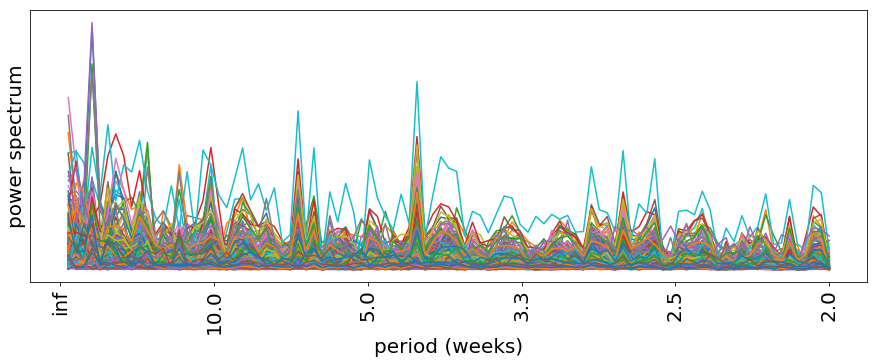

In [137]:
#average by ridership type and plot the power spextrum
mtabystation = np.nanmean(mta, axis=1)
fig = pl.figure(figsize = (15,5))
ax = fig.add_subplot(111)
freqs = np.fft.rfftfreq(N, 1.0)
this_ffts =  np.array([np.abs(np.fft.rfft(mtabystation[i])) 
                       for i in range(mta.shape[0])])
for this_fft in this_ffts:
    ax.plot(freqs[1:], (this_fft[1:]))
allperiods = [1.0/N, 1./104, 1.0/52, 1.0/26, 1.0/13, 1.0/8, 1.0/4, 1.0/2]
ax.set_xticklabels([ "%.1f"%(1/f) for f in ax.get_xticks()], rotation=90, fontsize=20)
ax.set_yticks([])
pl.xlabel("period (weeks)", fontsize=20)
pl.ylabel("power spectrum");

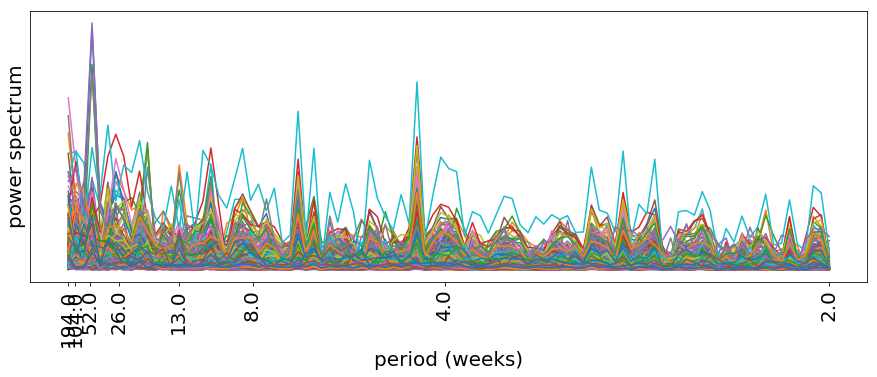

In [139]:

#plotting with a more informative set of x labels
fig = pl.figure(figsize = (15,5))
ax = fig.add_subplot(111)
this_ffts =  np.array([np.abs(np.fft.rfft(mtabystation[i]))
                       for i in range(mta.shape[0])])
for this_fft in this_ffts:
    ax.plot(freqs[1:],(this_fft[1:]))
allperiods = [1.0/194, 1./104, 1.0/52, 1.0/26, 1.0/13, 1.0/8, 1.0/4, 1.0/2]
ax.set_xticks (allperiods)
ax.set_xticklabels([ "%s"%(1/f) for f in allperiods], rotation=90, fontsize=20)
ax.set_yticks([])
pl.xlabel("period (weeks)", fontsize=20)
pl.ylabel("power spectrum");

In [140]:
# finding index of periodicity of 1 year
yearindex = np.where(np.abs(freqs - 1.0/52) == min(np.abs(freqs - 1.0/52)))[0]
print ("index of frequency closest to %.1f weeks (%.1f)"%(1.0/freqs[yearindex], yearindex))

index of frequency closest to 48.5 weeks (4.0)
